<a href="https://colab.research.google.com/github/ramakrishnan-thiyagu/Medical-Expenses-Prediction/blob/main/Medical_Expenses_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rcParams['figure.figsize']=15,6
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Medical Expenses Prediction/med-insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [24]:
df_dtype=df.dtypes
df_missing=df.isna().mean().round(4)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,0.0,int64,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,0.0,object,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.0,float64,1338,NaN,NaN,NaN,30.6655,6.09838,16,26.3,30.4,34.7,53.1
children,0.0,int64,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,0.0,object,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,0.0,object,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expenses,0.0,float64,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


In [25]:
df.shape

(1338, 7)

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

**Univariate Analysis**

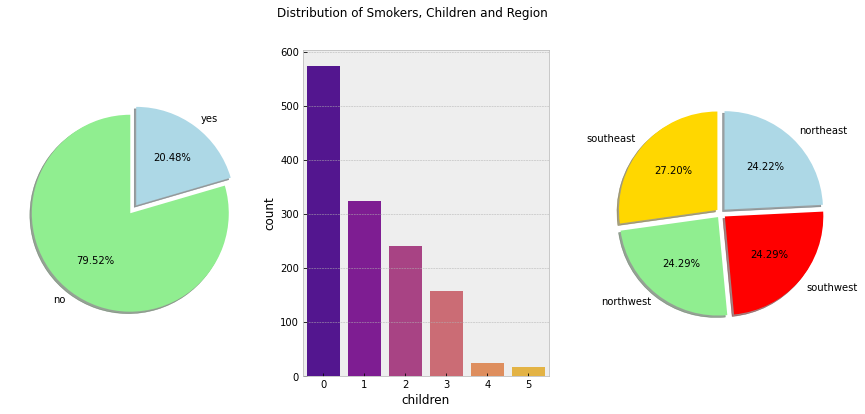

In [27]:
plt.subplot(131)
plt.pie(df['smoker'].value_counts().values,
        labels=df['smoker'].value_counts().index,
        startangle=90, explode=(0,0.1),
        colors=['lightgreen', 'lightblue'],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(df['children'], palette='plasma')

plt.subplot(133)
plt.pie(df['region'].value_counts().values,
        labels=df['region'].value_counts().index,
        startangle=90, shadow=True, explode=(0.05,0.05,0.05,0.05),
        colors=['gold', 'lightgreen', 'red', 'lightblue'], autopct='%1.2f%%')

plt.suptitle('Distribution of Smokers, Children and Region')
plt.show()

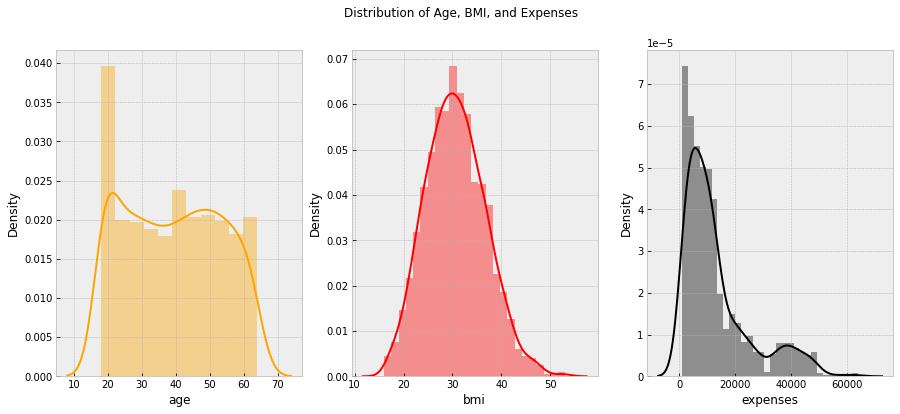

In [28]:
plt.subplot(131)
sns.distplot(df['age'], color='orange')

plt.subplot(132)
sns.distplot(df['bmi'], color='red')

plt.subplot(133)
sns.distplot(df['expenses'], color='black')

plt.suptitle('Distribution of Age, BMI, and Expenses')
plt.show()

**Bivariate Analysis**

In [29]:
px.scatter(data_frame=df, x='age', y='expenses',
           trendline="ols", marginal_y='violin')

In [30]:
px.scatter(data_frame=df, x='bmi', y='expenses',
           trendline="ols", marginal_y='violin')

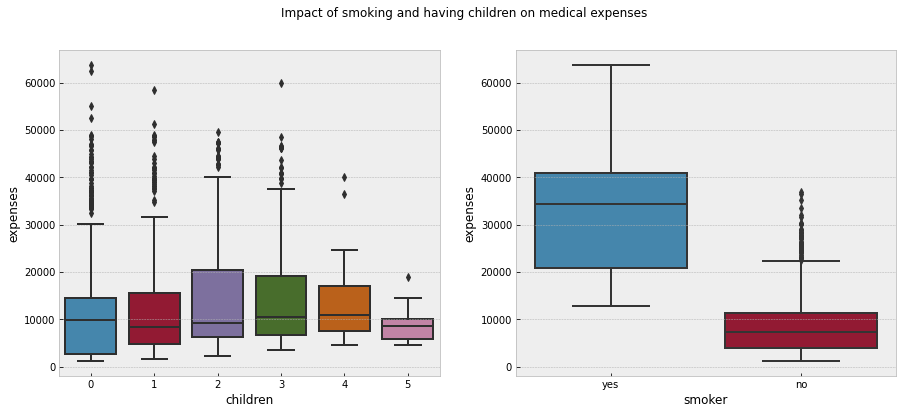

In [31]:
plt.subplot(121)
sns.boxplot(df['children'], df['expenses'])

plt.subplot(122)
sns.boxplot(df['smoker'], df['expenses'])

plt.suptitle('Impact of smoking and having children on medical expenses')
plt.show()

In [32]:
df['children'].values[df['children'].values>3]=3

**Multivariate Analysis**

In [33]:
px.scatter(df, x='expenses', y='age',
           color='smoker', trendline='ols',
           facet_row='children', facet_col='region')

In [34]:
px.scatter(df, x='expenses', y='bmi',
           color='smoker', trendline='ols',
           facet_row='children', facet_col='region')

In [45]:
px.scatter(df, x='expenses',
           y='bmi', size='age',
           color='smoker', size_max=15)

In [52]:
px.bar_polar(df, r='expenses', theta='region', color='sex')

In [59]:
df[['expenses', 'region']].groupby(['region']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')